In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv(r"C:\GreatLearning\Unsupervised ML\Project\wine.xls")

In [4]:
headers = ["Class","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium","Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins","Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

**Adding the column headers**

In [5]:
df.columns = headers

In [6]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
Alcohol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
Malic acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
Ash,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
Magnesium,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
Total phenols,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
Flavanoids,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
Nonflavanoid phenols,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [9]:
### Changing Class data type to categorical

df.Class = df.Class.astype('category')

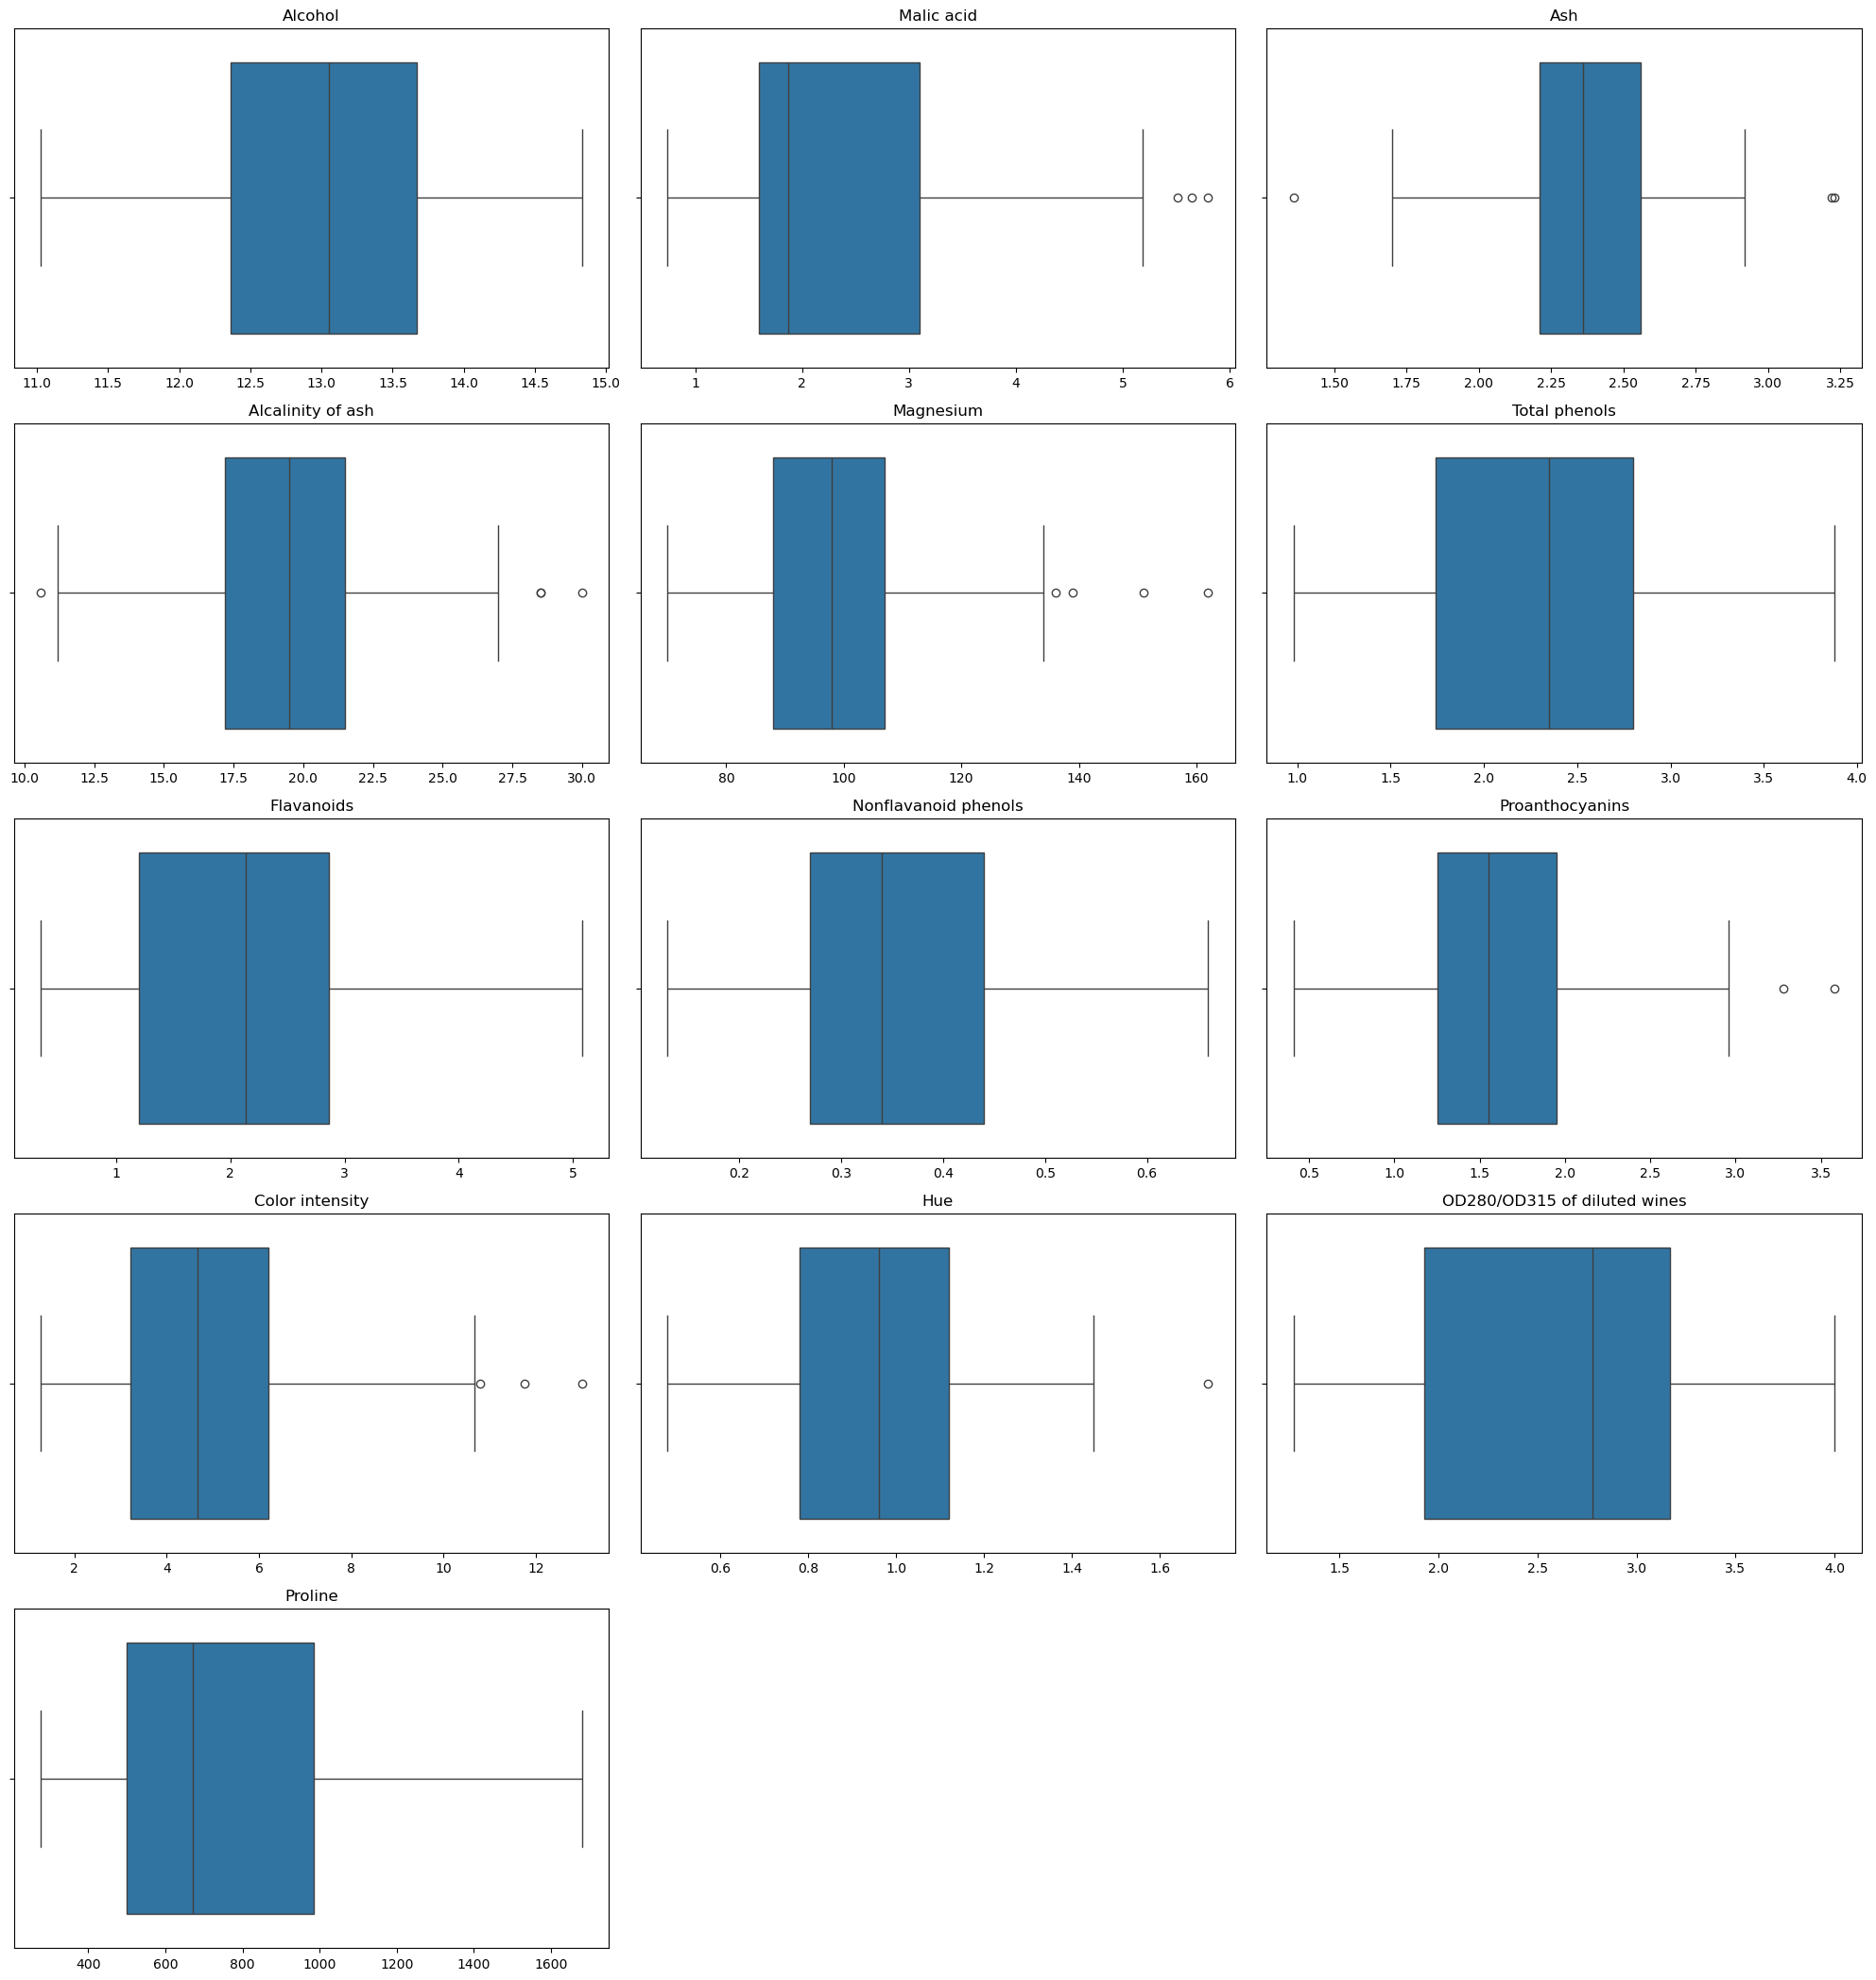

In [10]:
plt.figure(figsize=(20, 25))
for i, column in enumerate(df.select_dtypes(np.number), 1):
    plt.subplot(6,3,i)
    sns.boxplot(data=df[column], orient='h')
    plt.title(column)
    plt.xlabel("")

plt.tight_layout()
plt.show()
    

### Insights:

**No missing values**

**Class should be categorical data**

**Minimal outliers present in some columns**

#### Scaling the data

In [11]:
scaler = StandardScaler()

In [12]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [34]:
df_scaled.shape

(177, 14)

In [13]:
df1 = df.copy()

#### Using K-means clustering (find optimal value for K first)

In [14]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
for i, val in enumerate(wcss, start=1):
    print(f"WCSS for k={i}: {val}")

WCSS for k=1: 2478.0
WCSS for k=2: 1719.4802011829256
WCSS for k=3: 1283.0944138318914
WCSS for k=4: 1179.7339630034317
WCSS for k=5: 1137.9591699543612
WCSS for k=6: 1082.7241819164853
WCSS for k=7: 1002.3756076518896
WCSS for k=8: 993.5325889920387
WCSS for k=9: 926.8472081062521
WCSS for k=10: 900.5032142980324


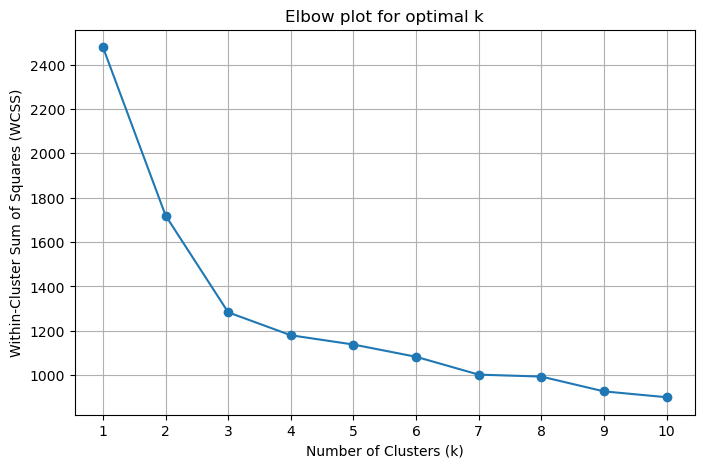

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow plot for optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

#### validating optimal K using silhouette coeffs plot

In [16]:
silhouette_scores = {}

for n_clusters in range(2, 10):  
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores[f"{n_clusters}"] = silhouette_avg


silhouette_df = pd.DataFrame(list(silhouette_scores.items()),columns=['Clusters','Silhouette Coefficient'])
silhouette_df

,Clusters,Silhouette Coefficient
0,2,0.285190
1,3,0.306310
2,4,0.273649
3,5,0.191384
4,6,0.181794
5,7,0.177588
6,8,0.183126
7,9,0.187788


In [17]:
print(f'--'*30)
print('Optimal number of clusters are :',silhouette_df.iloc[silhouette_df['Silhouette Coefficient'].idxmax(),0])
print(f'--'*30)

------------------------------------------------------------
Optimal number of clusters are : 3
------------------------------------------------------------


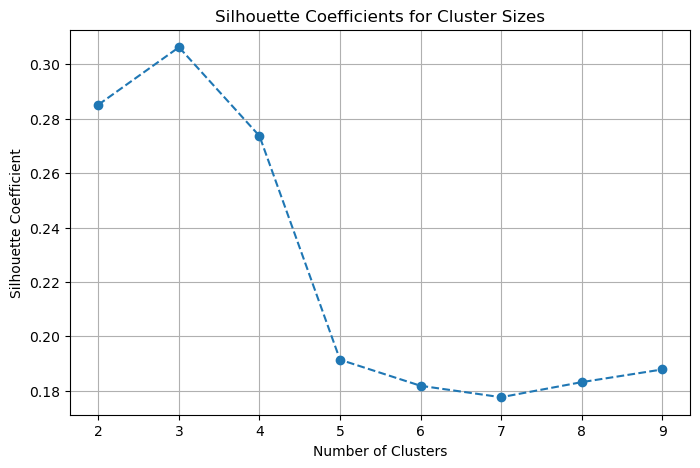

In [18]:
### plotting silhouette coefficients

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_df["Silhouette Coefficient"], marker='o', linestyle='--')
plt.title("Silhouette Coefficients for Cluster Sizes")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

**K-Means clustering**

In [19]:
k_means = KMeans(n_clusters = 3,random_state=42)
k_means.fit(df_scaled)
cluster_labels = k_means.labels_
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [20]:
print(f'--'*30)
print(f'Silhouette Score : {silhouette_score(df_scaled,cluster_labels)}')
print(f'--'*30)

------------------------------------------------------------
Silhouette Score : 0.3052703836110603
------------------------------------------------------------


**Applying PCA and re-applying K-Means**

In [21]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [22]:
## Validating the dimension reduction using PCA (<=1)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'\nSum of Cumulative Explained Variance: {np.sum(explained_variance)}')


Sum of Cumulative Explained Variance: 0.9653791698397947


In [23]:
k_means_new = KMeans(n_clusters=3,random_state=42)
k_means_new.fit(df_pca)
cluster_labels = k_means_new.labels_
df1['Clusters'] = cluster_labels

In [24]:
print(f'--'*30)
print(f'Silhouette Score : {silhouette_score(df_pca,cluster_labels)}')
print(f'--'*30)

------------------------------------------------------------
Silhouette Score : 0.601883223332822
------------------------------------------------------------


#### visualising clusters

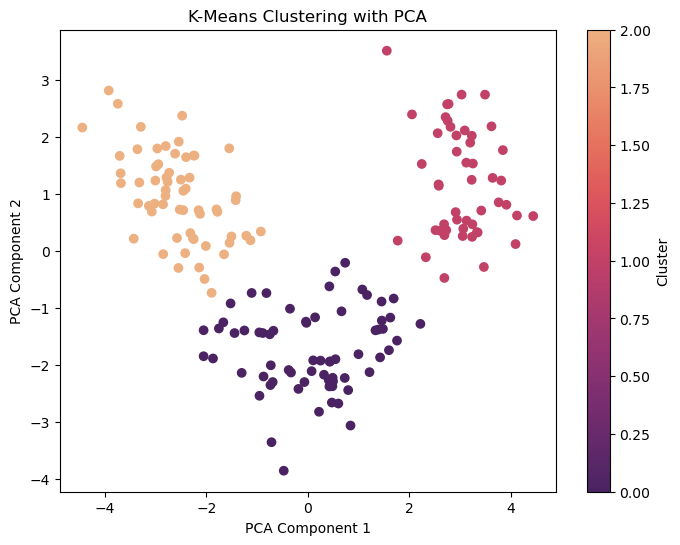

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df1.Clusters, cmap='flare_r')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

**Checking clusters summary**

In [26]:
df1.Clusters.value_counts().reset_index().merge(df1.drop('Class',axis=1).groupby('Clusters').mean(),on='Clusters').set_index('Clusters')

,count,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Clusters,,,,,,,,,,,,,,
0,67,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,61,13.667705,2.002623,2.466885,17.493443,107.655738,2.848361,3.002295,0.292295,1.916066,5.450492,1.065902,3.150984,1100.803279
1,49,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


**Using RandomForest to predict cluster labels**

In [27]:
X = df1.drop(['Class','Clusters'],axis=1)
y = df1.Clusters
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [28]:
rf = RandomForestClassifier(random_state=42)
rf_model = rf.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Test accuracy score: {accuracy_score(y_test,y_pred_rf):3f}')

Test accuracy score: 0.981481


In [29]:
y_train_pred_rf = rf_model.predict(X_train)
print(f'Train accuracy score: {accuracy_score(y_train,y_train_pred_rf)}')

Train accuracy score: 1.0


In [30]:
print(f'Classification Report:\n{classification_report(y_test,y_pred_rf)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        19

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [31]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred_rf)}')

Confusion Matrix:
[[19  1  0]
 [ 0 15  0]
 [ 0  0 19]]
